# Rework of the notebook in https://github.com/lmoroney/dlaicourse
# Course 1 - Part 4 - Lesson 2 - Notebook.ipynb

### Check the explanation of the cells in the original notebook given above, this notebook uses latest TF 2.0 version and apply few corrections on the code.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0-alpha0


In [2]:
mnist_fashion = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist_fashion.load_data()

Shape of the image:  (28, 28)
Label;  9


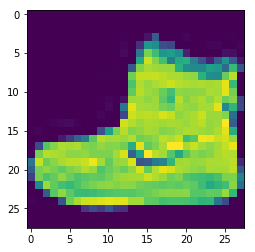

In [10]:
print("Shape of the image: ", training_images[0].shape)
print("Label; ",training_labels[0])
plt.imshow(training_images[0])

# Normalizing the training and test data

In [11]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

9


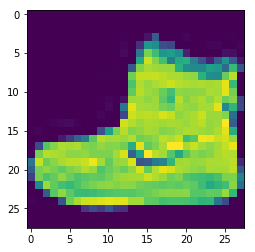

In [12]:
print(training_labels[0])
plt.imshow(training_images[0])

# Model design

In [13]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Fitting data

## correction:
In the original notebook, optimizer is set as: tf.train.AdamOptimizer().
This seems to be changed to tf.optimizers.Adam() in TF 2.0

In [14]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.4952 - accuracy: 0.8257
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3748 - accuracy: 0.8658s - loss:
Epoch 3/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3363 - accuracy: 0.8780
Epoch 4/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3123 - accuracy: 0.8854
Epoch 5/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2950 - accuracy: 0.8907s - loss: 0.2921 - accuracy: 0.


In [15]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.3554 - accuracy: 0.8728s - loss: 0.3587 - ac


[0.3554342260360718, 0.8728]

# Exercise 1:

In [16]:
classifications = model.predict(test_images)
print(classifications[0])

[1.1574908e-05 6.2851726e-08 8.8149172e-06 3.3561497e-07 5.1323186e-06
 1.8599423e-02 3.1619165e-05 6.9145150e-02 4.2962568e-04 9.1176826e-01]


9


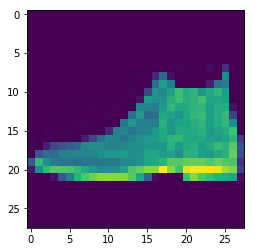

In [17]:
print(test_labels[0])
plt.imshow(test_images[0])

## correction:

Original notebook provides the following comment: "For the 7, the probability was .999+, i.e. the neural network is telling us that it's almost certainly a 7. "

However, highest probabability appears to be in the index 9 (10th element)in the list above. That corresponds to label 9.

# Exercise 2: Dense layer with 512 neurons

In [18]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 155us/sample - loss: 0.4775 - accuracy: 0.8275
Epoch 2/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.3618 - accuracy: 0.8674
Epoch 3/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3244 - accuracy: 0.8811
Epoch 4/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.3003 - accuracy: 0.8889
Epoch 5/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2830 - accuracy: 0.8951


In [19]:
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

10000/10000 [==============================] - 1s 53us/sample - loss: 0.3518 - accuracy: 0.8740
[4.5484135e-06 5.9205441e-08 1.7261179e-08 1.6519373e-08 1.0527731e-07
 2.3814864e-04 1.1932958e-06 1.1736439e-02 4.7013106e-08 9.8801941e-01]
9


## Dense layer with 1024 neurons

In [20]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 14s 236us/sample - loss: 0.4683 - accuracy: 0.8308
Epoch 2/5
60000/60000 [==============================] - 14s 225us/sample - loss: 0.3574 - accuracy: 0.8676
Epoch 3/5
60000/60000 [==============================] - 15s 247us/sample - loss: 0.3216 - accuracy: 0.8822
Epoch 4/5
60000/60000 [==============================] - 18s 305us/sample - loss: 0.2978 - accuracy: 0.8887
Epoch 5/5
60000/60000 [==============================] - 16s 262us/sample - loss: 0.2776 - accuracy: 0.8968


In [21]:
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

10000/10000 [==============================] - 1s 113us/sample - loss: 0.3486 - accuracy: 0.8734
[8.2962981e-07 5.3954235e-08 1.5941087e-08 2.3022679e-09 4.6929838e-08
 2.3201533e-02 3.0066235e-07 1.0737079e-02 2.6674843e-06 9.6605754e-01]
9


# Exercise 5: Another dense layer is added 


In [22]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 176us/sample - loss: 0.4660 - accuracy: 0.8316
Epoch 2/5
60000/60000 [==============================] - 13s 222us/sample - loss: 0.3541 - accuracy: 0.8704
Epoch 3/5
60000/60000 [==============================] - 14s 240us/sample - loss: 0.3188 - accuracy: 0.8812
Epoch 4/5
60000/60000 [==============================] - 14s 229us/sample - loss: 0.2959 - accuracy: 0.8887
Epoch 5/5
60000/60000 [==============================] - 11s 176us/sample - loss: 0.2751 - accuracy: 0.8951


In [23]:
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

10000/10000 [==============================] - 1s 78us/sample - loss: 0.3359 - accuracy: 0.8794
[1.0638250e-09 1.8471335e-08 4.1605570e-11 1.3968628e-09 4.3632403e-10
 4.3635387e-03 1.3106610e-08 1.1988894e-02 2.7551741e-07 9.8364729e-01]
9


# Exercise 6: model used in Ex.1 is trained with 10 epochs

In [24]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.5037 - accuracy: 0.8222s - loss: 0.5046 - accuracy: 0.82
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3776 - accuracy: 0.8635
Epoch 3/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3403 - accuracy: 0.8747
Epoch 4/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3120 - accuracy: 0.8863
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2943 - accuracy: 0.8909
Epoch 6/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2795 - accuracy: 0.8965
Epoch 7/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2689 - accuracy: 0.8995
Epoch 8/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2564 - accuracy: 0.9041
Epoch 9/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2448 - accuracy: 0.9075
Epoc

In [25]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3435 - accuracy: 0.8804


[0.3434678675174713, 0.8804]

## The same model trained with 30 epochs

In [26]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 5s 79us/sample - loss: 0.5036 - accuracy: 0.8228
Epoch 2/30
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3767 - accuracy: 0.8633
Epoch 3/30
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3385 - accuracy: 0.8770
Epoch 4/30
60000/60000 [==============================] - 8s 138us/sample - loss: 0.3152 - accuracy: 0.8840
Epoch 5/30
60000/60000 [==============================] - 8s 138us/sample - loss: 0.2954 - accuracy: 0.8909
Epoch 6/30
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2817 - accuracy: 0.8956s - loss: 0.2838 - accu - ETA: 0s - los
Epoch 7/30
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2706 - accuracy: 0.8992
Epoch 8/30
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2574 - accuracy: 0.9045
Epoch 9/30
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2484 - accuracy: 0.9

In [27]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.4171 - accuracy: 0.8797


[0.41710737167298795, 0.8797]

# Exercise 7: Without data normalization


In [28]:
(training_images, training_labels), (test_images, test_labels) = mnist_fashion.load_data()

##  Correction:
Here values are divided with 1.0 in order to get float data, otherwise fir function will complain: 
Unable to build `Dense` layer with non-floating point dtype <dtype: 'uint8'>

In [29]:
training_images = training_images / 1.0
test_images = test_images / 1.0

In [30]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [31]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 65us/sample - loss: 3.7941 - accuracy: 0.6983
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.6842 - accuracy: 0.7691
Epoch 3/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.5800 - accuracy: 0.8010
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.5333 - accuracy: 0.8189
Epoch 5/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5150 - accuracy: 0.8239s - loss: 0.5092 - accu


In [32]:
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

10000/10000 [==============================] - 0s 39us/sample - loss: 0.5858 - accuracy: 0.7994
[7.9844758e-06 3.8294825e-09 2.9978117e-18 3.5986738e-24 2.3079869e-14
 3.3560213e-02 2.4459580e-11 1.8759917e-01 6.1827304e-17 7.7883267e-01]
9


# Exercise 8:


In [33]:
(training_images, training_labels), (test_images, test_labels) = mnist_fashion.load_data()

In [34]:
training_images = training_images / 255.0
test_images = test_images / 255.0

## correction: 
Function below on_epoch_end is edited, so a bit different than the one given in the course.

In [38]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    loss_stop_threshold = 0.25
    if(logs.get('loss')<loss_stop_threshold):
      print('\nReached {0} loss so cancelling training!'.format(loss_stop_threshold))
      self.model.stop_training = True

In [39]:
callbacks = myCallback()

In [40]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4983 - accuracy: 0.8249
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3762 - accuracy: 0.8643
Epoch 3/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3403 - accuracy: 0.8753
Epoch 4/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3137 - accuracy: 0.8847
Epoch 5/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2974 - accuracy: 0.8912s - loss:
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2807 - accuracy: 0.8963s - l
Epoch 7/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2693 - accuracy: 0.9003
Epoch 8/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2558 - accuracy: 0.9053
Epoch 9/10
59328/60000 [============================>.] - ETA: 0s - loss: 0.2480 - accuracy: 0.9067
Reached 0.25 loss so cancellin